In [1]:
#import necessary packages
from datetime import datetime
#import it in console with: pip install pandas-datareader
import pandas_datareader.data as wb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Input
# ticker: list of chosen stock
# start_date: start date of search in YYYY-M-D format
# end_date: end date of search in YYYY-M-D format
# Output
# Pandas dataframe with fiance data
def get_data_from_api(ticker, start_date, end_date):
    dataframe = pd.DataFrame()
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe

In [3]:
#Preprocess data
def process_data(raw_df, standarize, drop_standard, calculations):
        #Set index as datetime
        raw_df.index = pd.to_datetime(raw_df.index)
        #Set label by shifting Closing price by -1
        raw_df['Label'] = raw_df['Close'].shift(-1)
        #Log_r
        log_r = np.log(raw_df['Close'] / raw_df['Close'].shift(1))
        max_roll_window = 0
        #Check which calculations should be applied
        if 'MA5' in calculations:
            raw_df['MA5'] = raw_df['Close'].rolling(5).mean()
            max_roll_window = 5
        if 'MA7' in calculations:
            raw_df['MA7'] = raw_df['Close'].rolling(7).mean()
            max_roll_window = 7
        if 'MA20' in calculations:
            raw_df['MA20'] = raw_df['Close'].rolling(20).mean()
            max_roll_window = 20
        if 'MIN' in calculations:
            raw_df['MIN'] = raw_df['Close'].rolling(max_roll_window).min()
        if 'MAX' in calculations:
            raw_df['MAX'] = raw_df['Close'].rolling(max_roll_window).max()
        if 'mom' in calculations:
            raw_df['mom'] = log_r.rolling(max_roll_window).mean()
            print(max_roll_window)
        if 'vola' in calculations:
          raw_df['vola'] = log_r.rolling(max_roll_window).std()

        #Drop non-used columns
        if drop_standard:
            raw_df = raw_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)
        #Drop NaN values
        raw_df = raw_df.dropna()
        #Standarizing
        if standarize:
            raw_df = (raw_df-raw_df.mean())/raw_df.std()
        return raw_df

In [4]:
import math
#Split into train and test
def split_data(df_input, percent):
    # Array splicing and splitting of data
    rdf = df_input.to_numpy()

    X, y = rdf[:, :-1], rdf[:, -1]

    # pct split
    limit = math.floor(len(X) * percent)

    X_train, X_test = X[:limit,:],X[limit:,:]

    y_train, y_test = y[:limit],y[limit:]
    print(X_train)
    return X_train, X_test, y_train, y_test

In [5]:
from sklearn.linear_model import LinearRegression
def linear_reg(X_train, X_test, y_train, y_test):
    model = LinearRegression().fit(X_train, y_train)
    model.score(X_test, y_test)
    predictions = model.predict(X_test)
    print("Actual: ", y_test[:3])
    print("Forecasted: ", predictions[:3])
    return predictions

In [6]:
# MLPRegression
## MLP Reg
from sklearn.neural_network import MLPRegressor
def MLP_reg(X_train, X_test, y_train, y_test, rnd_state, max_it):
    regr = MLPRegressor(random_state=rnd_state, max_iter=max_it).fit(X_train, y_train)
    print(regr.score(X_train, y_train))
    MLPpredictions = regr.predict(X_test)
    print(regr.score(X_test, y_test))
    return MLPpredictions

In [7]:
def experiment_1():
    # Get stock data about Microsoft from 1990-01-01 to 2021-01-01
    # Multile tickers
    ##tickerList = ['MSFT', 'AAPL']
    start = datetime(1990,1,1)
    end = datetime(2021,5,5)
    tickerList = 'MSFT'
    df = get_data_from_api(tickerList, start, end)

    #Process data
    #raw_df, standarize, drop_standard, calculations
    df_mod = process_data(df, False, True, [])
    df_mod.tail(5)


    #Split data into train and test
    df_splitted = split_data(df_mod, 0.8)

    #Do linear regression
    linear_predictions = linear_reg(df_splitted[0], df_splitted[1], df_splitted[2], df_splitted[3] )

    print(linear_predictions)
    #MLPRegression
    rnd_state = 1
    max_it = 500
    MLP_predictions = MLP_reg(df_splitted[0], df_splitted[1], df_splitted[2], df_splitted[3], rnd_state, max_it)
    print(MLP_predictions)


    ##Visualzie the predictions
    #Visualize to understand the model behaviour
    df_pred = pd.DataFrame(data=MLP_predictions, columns=["Predictions"])
    df_pred["actual"] = df_splitted[3].tolist()
    df_pred["linear"] = linear_predictions.tolist()
    df_pred.plot()
    plt.show()

[[ 0.616319  ]
 [ 0.61979198]
 [ 0.63802099]
 ...
 [45.91999817]
 [47.13000107]
 [47.18000031]]
Actual:  [42.65999985 41.18999863 42.00999832]
Forecasted:  [46.99912005 42.65227972 41.18334573]
[ 46.99912005  42.65227972  41.18334573 ... 252.02015905 251.7003993
 247.63334684]
0.9983948358381166
0.9973957394345818
[ 46.95853775  42.66741129  41.19965223 ... 247.85045986 247.53717035
 243.55241338]


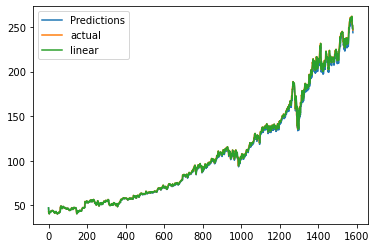

In [8]:
#Linear and Regression without standarizing the values
experiment_1()

In [9]:
def experiment_2():
    # Get stock data about Microsoft from 1990-01-01 to 2021-01-01
    # Multile tickers
    ##tickerList = ['MSFT', 'AAPL']
    start = datetime(1990,1,1)
    end = datetime(2021,5,5)
    tickerList = 'MSFT'
    df = get_data_from_api(tickerList, start, end)

    #Process data
    #raw_df, standarize, drop_standard, calculations
    df_mod = process_data(df, True, True, [])
    df_mod.tail(5)


    #Split data into train and test
    df_splitted = split_data(df_mod, 0.8)

    #Do linear regression
    linear_predictions = linear_reg(df_splitted[0], df_splitted[1], df_splitted[2], df_splitted[3] )

    print(linear_predictions)
    #MLPRegression
    rnd_state = 1
    max_it = 500
    MLP_predictions = MLP_reg(df_splitted[0], df_splitted[1], df_splitted[2], df_splitted[3], rnd_state, max_it)
    print(MLP_predictions)


    ##Visualzie the predictions
    #Visualize to understand the model behaviour
    df_pred = pd.DataFrame(data=MLP_predictions, columns=["Predictions"])
    df_pred["actual"] = df_splitted[3].tolist()
    df_pred["linear"] = linear_predictions.tolist()
    df_pred.plot()
    plt.show()

[[-0.85513624]
 [-0.85505901]
 [-0.85465366]
 ...
 [ 0.15226693]
 [ 0.17917337]
 [ 0.18028518]]
Actual:  [0.07898039 0.04633488 0.06454528]
Forecasted:  [0.17534276 0.07880894 0.04618713]
[0.17534276 0.07880894 0.04618713 ... 4.7284117  4.72131054 4.63099019]
0.9983694910730384
0.8085780230637265
[0.17481136 0.08155363 0.04804226 ... 3.16681478 3.16266464 3.10987857]


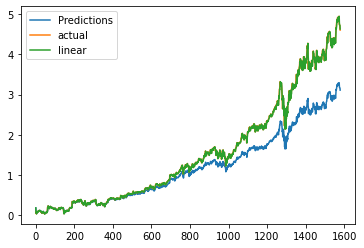

In [10]:
#Linear and MLP with standarized input
experiment_2()

In [11]:
def experiment_3():
    # Get stock data about Microsoft from 1990-01-01 to 2021-01-01
    # Multile tickers
    ##tickerList = ['MSFT', 'AAPL']
    start = datetime(1990,1,1)
    end = datetime(2021,5,5)
    tickerList = 'MSFT'
    df = get_data_from_api(tickerList, start, end)

    #Process data
    #raw_df, standarize, drop_standard, calculations
    df_mod = process_data(df, True, True, ['MA7', 'MA20', 'MIN', 'MAX'])
    df_mod.tail(5)


    #Split data into train and test
    df_splitted = split_data(df_mod, 0.8)

    #Do linear regression
    linear_predictions = linear_reg(df_splitted[0], df_splitted[1], df_splitted[2], df_splitted[3] )

    #MLPRegression
    rnd_state = 1
    max_it = 500
    MLP_predictions = MLP_reg(df_splitted[0], df_splitted[1], df_splitted[2], df_splitted[3], rnd_state, max_it)
    print(MLP_predictions)


    ##Visualzie the predictions
    #Visualize to understand the model behaviour
    df_pred = pd.DataFrame(data=MLP_predictions, columns=["Predictions"])
    df_pred["actual"] = df_splitted[3].tolist()
    df_pred["linear"] = linear_predictions.tolist()
    df_pred.plot()
    plt.show()

[[-0.85649777 -0.85611673 -0.85820694 -0.86238514 -0.85998568]
 [-0.85653636 -0.85592403 -0.85827062 -0.86236556 -0.85998568]
 [-0.8563434  -0.85573131 -0.85823186 -0.8623401  -0.85998568]
 ...
 [ 0.0776881   0.04425937  0.15643272  0.1696859   0.13302212]
 [ 0.04501069  0.06246388  0.14032462  0.16262583  0.09831798]
 [ 0.06323888  0.02672093  0.12635365  0.15697553  0.09831798]]
Actual:  [0.15001834 0.15001834 0.15001834]
Forecasted:  [0.18237296 0.18392884 0.18291356]
0.9952570794869241
0.9946611448198313
[0.13971325 0.13536823 0.12782086 ... 4.92926751 4.93088788 4.90104654]


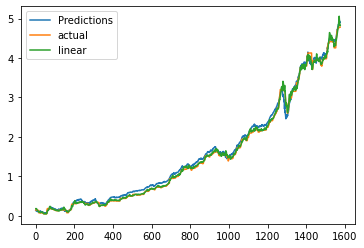

In [12]:
experiment_3()

In [13]:

print("test")

test


In [15]:
def experiment_4():
    # Get stock data about Microsoft from 1990-01-01 to 2021-01-01
    # Multile tickers
    ##tickerList = ['MSFT', 'AAPL']
    start = datetime(1990,1,1)
    end = datetime(2021,5,5)
    tickerList = 'MSFT'
    df = get_data_from_api(tickerList, start, end)

    #Process data
    #raw_df, standarize, drop_standard, calculations
    df_mod = process_data(df, True, True, ['MA7', 'MA20', 'MIN', 'MAX'])
    df_mod.tail(5)


    #Split data into train and test
    df_splitted = split_data(df_mod, 0.8)

    #Do linear regression
    linear_predictions = linear_reg(df_splitted[0], df_splitted[1], df_splitted[2], df_splitted[3] )

    #MLPRegression
    rnd_state = 1
    max_it = 500
    MLP_predictions = MLP_reg(df_splitted[0], df_splitted[1], df_splitted[2], df_splitted[3], rnd_state, max_it)
    print(MLP_predictions)


    ##Visualzie the predictions
    #Visualize to understand the model behaviour
    df_pred = pd.DataFrame(data=MLP_predictions, columns=["Predictions"])
    df_pred["actual"] = df_splitted[3].tolist()
    df_pred["linear"] = linear_predictions.tolist()
    df_pred.plot()
    plt.show()

[[-0.85649777 -0.85611673 -0.85820694 -0.86238514 -0.85998568]
 [-0.85653636 -0.85592403 -0.85827062 -0.86236556 -0.85998568]
 [-0.8563434  -0.85573131 -0.85823186 -0.8623401  -0.85998568]
 ...
 [ 0.0776881   0.04425937  0.15643272  0.1696859   0.13302212]
 [ 0.04501069  0.06246388  0.14032462  0.16262583  0.09831798]
 [ 0.06323888  0.02672093  0.12635365  0.15697553  0.09831798]]
Actual:  [0.15001834 0.15001834 0.15001834]
Forecasted:  [0.18237296 0.18392884 0.18291356]
0.9952570794869241
0.9946611448198313
[0.13971325 0.13536823 0.12782086 ... 4.92926751 4.93088788 4.90104654]


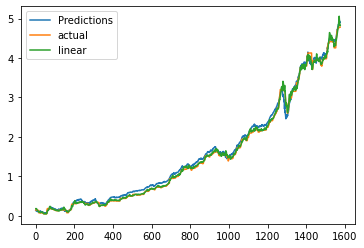

In [16]:
experiment_4()

In [38]:
print("Very nice!")


Very nice!
